# `stats` subpackage of `scipy`

Let's first look how we draw some random variables. 

There are many probability distributions. Some are *continuous* while some are *discrete*. Examples of famous distributions are:

* normal (norm)
* exponential (expon)
* poisson and
* bernoulli

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# let us try to draw some random variables
import numpy as np
from scipy import stats

rv = stats.norm()
rv.random_state = 42 # this is how we make it debug-able.

In [3]:
variable_1 = rv.rvs()
print (variable_1)

0.4967141530112327


In [4]:
variable_2 = rv.rvs()
print (variable_2)

-0.13826430117118466


In [5]:
variables = rv.rvs(1000)
print (variables[0:10])

[ 0.64768854  1.52302986 -0.23415337 -0.23413696  1.57921282  0.76743473
 -0.46947439  0.54256004 -0.46341769 -0.46572975]


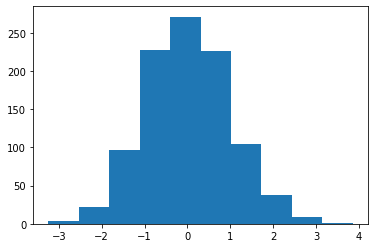

In [6]:
plt.hist(variables)
plt.show()

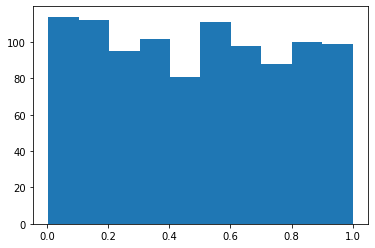

In [7]:
# let's try uniform distribution
rv_uniform = stats.uniform()
rv_uniform.random_state = 42
vars_uniform = rv_uniform.rvs(size=1000)
plt.hist(vars_uniform, bins=10)
plt.show()

In [ ]:
# try expon distribution

In [ ]:
# try poisson distribution

In [ ]:
# try bernoulli distribution

## Central Limit Theorem

**This is for interviews.** In day-to-day operation, one does not need this to remember. 

* First, we assume there is a probability distribution, from which we can draw multiple random variables. 
* We draw $j$ number of random variables. Then, we compute the means $\mu$ of this. We call these **1 sample**.
* We *repeat* it for sufficient number of times (1000) or at least 30!!!.
  * Note: 30 is just a number from an example in a famous text book. Beware!!!
* When we try to figure out the distribution of the samples (the means), we will find it is **normally distributed**.

In [8]:
# let's try np.mean (which we haven't yet)
a = np.array([
    [0, 1, 2],
    [0, 0, 0]
])
np.mean(a, axis=1)

array([1., 0.])

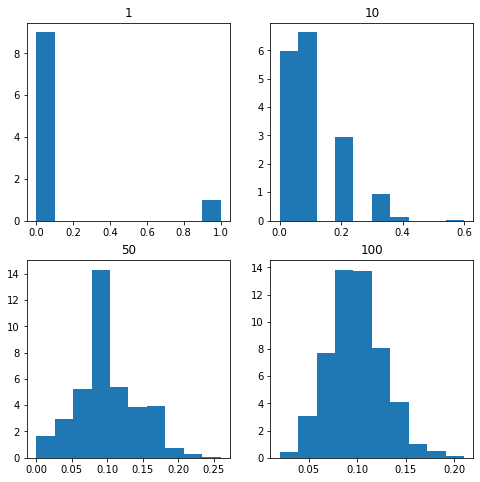

In [9]:
# number of sample
num = [1, 10, 50, 100] 
# list of sample means
means = [] 
 
# Generating 1, 10, 30, 100 random numbers from A UNIFORM DISTRIBUTION
# taking their mean and appending it to list means.
for j in num:
    # Generating seed so that we can get same result
    # every time the loop is run...
    rv = stats.bernoulli(p=0.10)
    rv.random_state = 42
    x = [rv.rvs(size=j) for _ in range(0, 1000)]
    means.append(np.mean(x, axis=1))
k = 0

# plotting all the means in one figure
fig, ax = plt.subplots(2, 2, figsize =(8, 8))
for i in range(0, 2):
    for j in range(0, 2):
        # Histogram for each x stored in means
        ax[i, j].hist(means[k], 10, density = True)
        ax[i, j].set_title(label = num[k])
        k = k + 1
plt.show()

In [ ]:
# try it with other distributions such as norm, exponential, poisson or bernoulli etc.

In [10]:
# let's see if a sample m belongs to a distribution x
rv = stats.norm()
rv.random_state = 42
x = rv.rvs(size=30)
m = 0.3
print (stats.ttest_1samp(x, m))

Ttest_1sampResult(statistic=-2.9707461868401968, pvalue=0.005914816566263673)


In [11]:
# let's see if a sample m belongs to a distribution x
rv = stats.norm()
rv.random_state = 42
x = rv.rvs(size=30)
m = 0.30
print (stats.ttest_1samp(x, m))

Ttest_1sampResult(statistic=-2.9707461868401968, pvalue=0.005914816566263673)


In [12]:
# let's see if a sample m belongs to a distribution x
m = 0.9
print (stats.ttest_1samp(x, m))

Ttest_1sampResult(statistic=-6.622203826443929, pvalue=2.93501085733472e-07)


Smaller $p$ value means less confident to reject null-hypothesis that the the measurement $m$ does not belong to the sample $x$. In short, $p \leq 0.05$ means they are from the same distribution. 

Let's try t-test with two distributions.

In [13]:
# let's see if x_1 and x_2 belongs to same distribution
rv_1 = stats.norm()
x_1 = rv.rvs(size=30)
rv_2 = stats.norm()
x_2 = rv.rvs(size=30)
print (stats.ttest_ind(a=x_1, b=x_2))

Ttest_indResult(statistic=-0.5396565532668491, pvalue=0.5914998283292681)


In [14]:
# let's see if x_1 and x_2 belongs to same distribution
rv_1 = stats.norm(loc=5, scale=4)
x_1 = rv_1.rvs(size=300)
rv_2 = stats.norm(loc=8, scale=20)
x_2 = rv_2.rvs(size=300)
print (stats.ttest_ind(a=x_1, b=x_2))

Ttest_indResult(statistic=-3.848562215611672, pvalue=0.0001315969523421041)
